
<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 1: Insallating Essential Libraries
</div>

# 📊 **Installating Essential Libraries**
---


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

+ /Users/ashutoshwagh/anaconda3/bin/ninja
[1/1] Generating write_version_file with a custom command



<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 2: Reading Data
</div>

# 🧹 **Reading Data**
---

In [2]:
chase_data = pd.read_excel("chase.xls")


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 3: Reading Data
</div>

# 🧠 **Reading Data**
---


In [5]:
discover_data = pd.read_excel("discover.xlsx")

In [6]:
#Preliminary Cleaning of Chase Data


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 4: Cleaning & Prepping of Chase Data.
</div>

# 🧹 **Data Cleaning & Preparation**
---

Preliminary Cleaning of Chase Data


In [7]:
#We can drop Memo and Post date
chase_data.drop(["Post Date", "Memo"], inplace = True, axis = 1)

#Focusing on the 'Sale' type as those are the ones with expenses.
chase_data = chase_data[chase_data['Type'] == 'Sale']

In [8]:
def get_abs_val(x):
    return abs(x)

In [9]:
chase_data['Amount'] = chase_data['Amount'].apply(get_abs_val)


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 5: Cleaning & Prepping of Discover Data.
</div>

# 📊 **Cleaning up Discover Data.**
---

Preliminary Cleaning of Discover Data


In [10]:
discover_data.drop("Post date", axis = 1, inplace = True)

In [11]:
discover_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Trans. date  97 non-null     datetime64[us]
 1   Description  97 non-null     str           
 2   Amount       97 non-null     float64       
 3   Category     97 non-null     str           
dtypes: datetime64[us](1), float64(1), str(2)
memory usage: 8.6 KB


In [12]:
discover_data['Category'].value_counts()

Category
Merchandise             37
Payments and Credits    27
Services                25
Supermarkets             5
Restaurants              3
Name: count, dtype: int64

In [13]:
#Removing the Payments and Credits from the data to focus on Expenses.
rows_to_drop = discover_data[discover_data['Category'] == 'Payments and Credits'].index
d_data = discover_data.drop(rows_to_drop, axis = 0)

In [14]:
d_data['Amount'] = d_data['Amount'].apply(get_abs_val)

In [15]:
d_data.columns

Index(['Trans. date', 'Description', 'Amount', 'Category'], dtype='str')

In [16]:
new_column_order = ['Trans. date', 'Description','Category','Amount']
d_data_reordered = d_data[new_column_order]

In [17]:
#Since we have now cleaned both the datasets (mostly), its time to do a union to form the whole dataset.


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 6: Data Union
</div>

# ✅ **Data Union**
---

Since we have now cleaned both the datasets (mostly), its time to do a union to form the whole dataset.


In [18]:
d_data_reordered = d_data_reordered.rename(columns={'Trans. date': 'Transaction Date'})
data_union = pd.concat([chase_data,d_data_reordered], ignore_index = True) 

In [19]:
data_union.shape

(644, 5)


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 7: Drop Outliers
</div>

# 🧠 **Outlier Removal and Removing Data which are not in the time period of last 7 months.**
---



In [20]:
#Removing Outliers and Removing Monthly Expenses such as Gym, Insurance etc

data_union[data_union['Category'] == 'Education']
#data_union.drop(116, axis = 0, inplace= True)
rows_to_drop = list(data_union[data_union['Description'].str.contains('PAULO')].index)
rows_to_drop.extend(list(data_union[data_union['Description'].str.contains('Ambetter')].index))
rows_to_drop.extend(list(data_union[data_union['Description'].str.contains('GEICO')].index))
rows_to_drop.extend(list(data_union[data_union['Description'].str.contains('YMCA')].index))
data_union[data_union['Description'].str.contains('WHOP')]
rows_to_drop.extend([535,428,116,361])
data_union.drop(rows_to_drop, axis = 0, inplace = True)

In [21]:
renterinsurance = data_union[data_union['Description'].str.contains('AGI')].index
data_union.drop(renterinsurance, axis = 0, inplace = True)

In [22]:
#Since we are focusing on data of past 7 months only.

data = data_union[data_union['Transaction Date'].between(pd.to_datetime("2025-02-01"),pd.to_datetime( "2025-09-30"))]


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 8: Group by
</div>

# 📈 **Group by Day and Day of the Week.**
---



In [23]:
#Group Data on Daily Basis

In [24]:
daily_spending = data.groupby('Transaction Date').agg({'Amount': 'sum',
                                                      'Transaction Date': 'first'})

In [25]:
daily_spending
daily_spending = daily_spending.reset_index(drop = True)

In [26]:
new_order = ['Transaction Date', 'Amount']
daily_spending = daily_spending[new_order]

In [27]:
daily_spending['Day of the week'] = daily_spending['Transaction Date'].dt.day_name()

In [28]:
daily_spending['is_weekend'] = daily_spending['Transaction Date'].dt.dayofweek >=5

In [29]:
weekday_spending = daily_spending[daily_spending['is_weekend'] == False]
weekend_spending = daily_spending[daily_spending['is_weekend'] == True]

In [30]:
print(f"Weekday spending : {len(weekday_spending)}")
print(f"Weekend spending : {len(weekend_spending)}")

Weekday spending : 151
Weekend spending : 58



<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
Step 9 : Visualization
</div>

# 📊 Graph
---


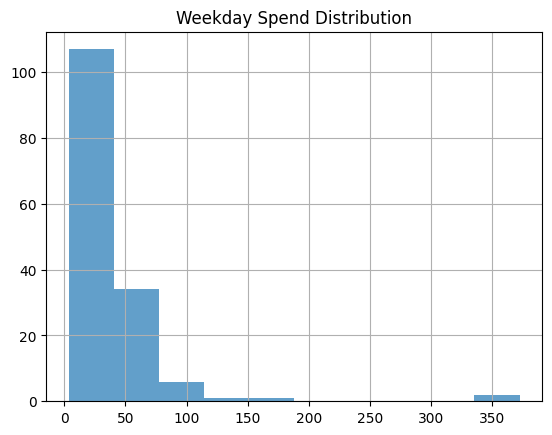

In [33]:
weekday_spending['Amount'].hist(bins = 10, alpha =0.7)
plt.title("Weekday Spend Distribution")
plt.show()

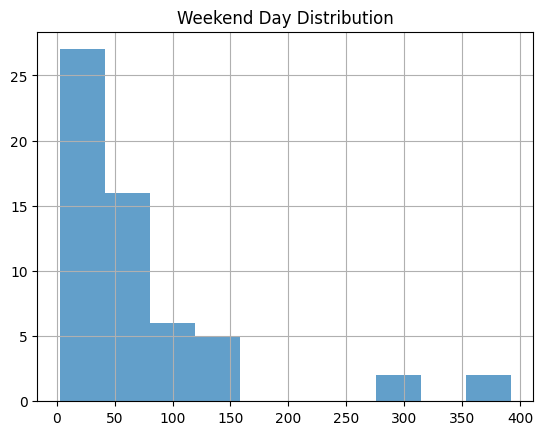

In [34]:
weekend_spending['Amount'].hist(bins= 10, alpha = 0.7)
plt.title("Weekend Day Distribution")
plt.show()

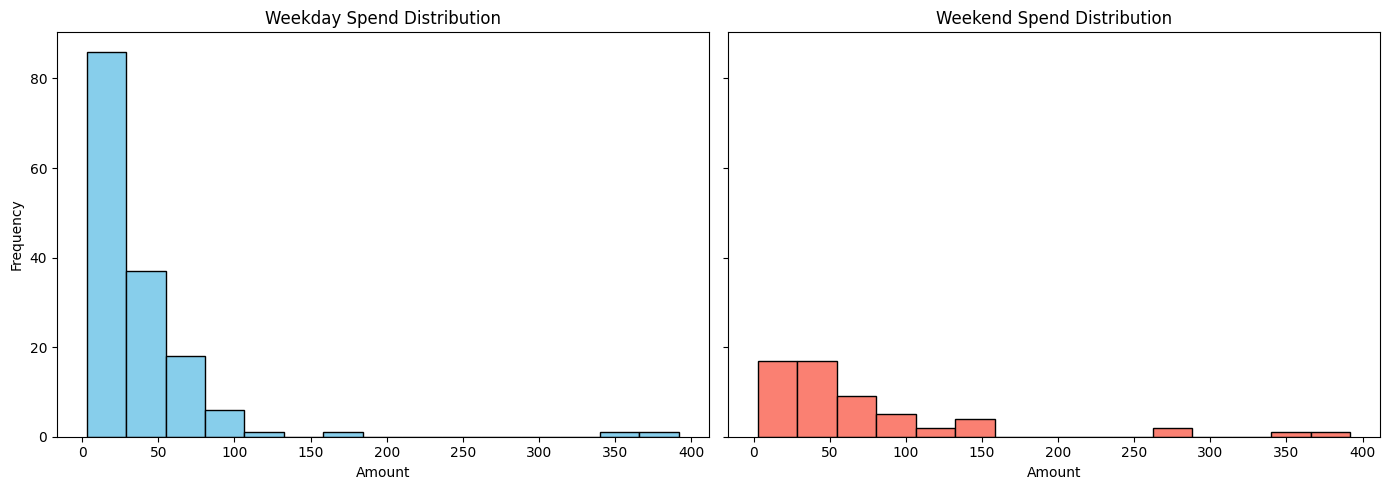

In [35]:
# Get global min/max for consistent bins
min_val = min(weekday_spending['Amount'].min(), weekend_spending['Amount'].min())
max_val = max(weekday_spending['Amount'].max(), weekend_spending['Amount'].max())

bins = 15 

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Weekday histogram
axes[0].hist(weekday_spending['Amount'], bins=bins, range=(min_val, max_val), color='skyblue', edgecolor='black')
axes[0].set_title("Weekday Spend Distribution")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Frequency")

# Weekend histogram
axes[1].hist(weekend_spending['Amount'], bins=bins, range=(min_val, max_val), color='salmon', edgecolor='black')
axes[1].set_title("Weekend Spend Distribution")
axes[1].set_xlabel("Amount")

plt.tight_layout()
plt.show()

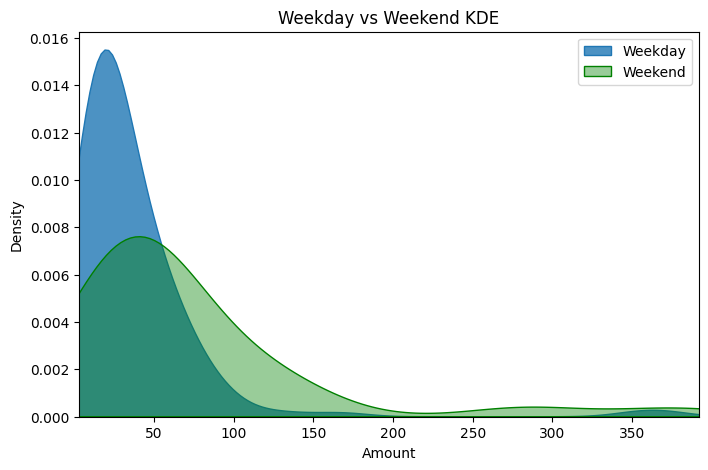

In [36]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=weekday_spending,x ='Amount', fill=True, alpha=0.8, label='Weekday')
sns.kdeplot(data=weekend_spending,x ='Amount', fill=True, alpha=0.4, label='Weekend',color ='green')
min_val = min(weekday_spending['Amount'].min(), weekend_spending['Amount'].min())
max_val = max(weekday_spending['Amount'].max(), weekend_spending['Amount'].max())
plt.xlim(min_val, max_val)
plt.title("Weekday vs Weekend KDE")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 10: Testing Data
</div>

# ✅ **Testing Data**
---

Conducting Tests on data to verify

1)Autocorreclation

2)Data Independence

3)Normality


In [37]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(daily_spending['Amount'])


np.float64(1.1791060160190607)

In [38]:
df = daily_spending.groupby("Day of the week").agg({'Amount': 'mean'})

In [39]:
df = df.reset_index()

In [40]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=weekday_order, ordered=True)

df_sorted = df.sort_values('Day of the week')

In [41]:
df_sorted

,Day of the week,Amount
1,Monday,24.640345
5,Tuesday,44.941515
6,Wednesday,24.999600
4,Thursday,32.995000
0,Friday,49.649687
2,Saturday,70.544400
3,Sunday,73.216061


In [42]:
from scipy.stats import levene

stat, p = levene(weekday_spending['Amount'],weekend_spending['Amount'])
print("Levene p-value:", p)

Levene p-value: 0.0043017167834905725



<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 11: Check for Skewness
</div>

---



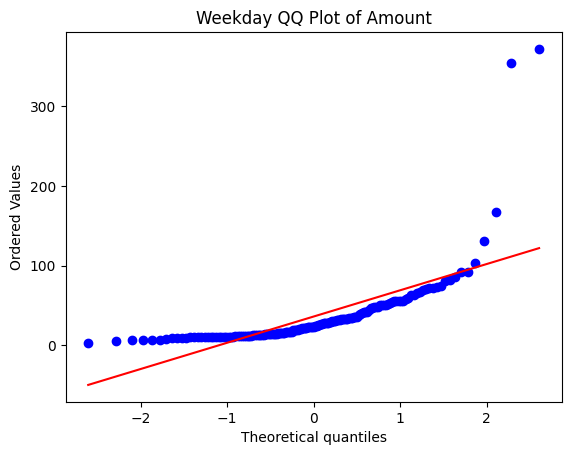

In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(weekday_spending['Amount'], dist="norm", plot=plt)
plt.title("Weekday QQ Plot of Amount")
plt.show()

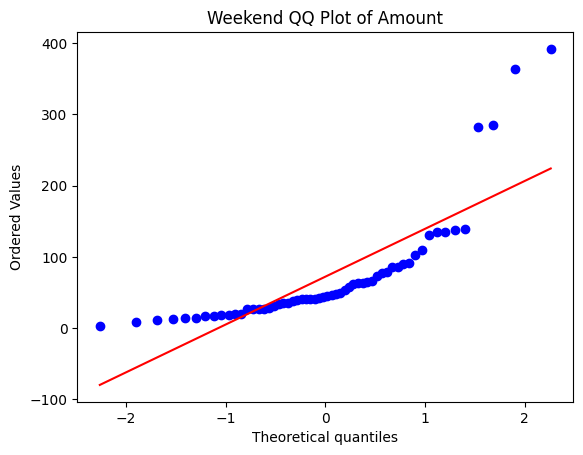

In [44]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(weekend_spending['Amount'], dist="norm", plot=plt)
plt.title("Weekend QQ Plot of Amount")
plt.show()


<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 12: Mann Whitney U Test
</div>

# 📈 **Statistical Testing & Insights**
---
Hypothesis:

Null Hypothesis (H₀): Median weekend spending is greater than or equal to median weekday spending.

Alternative Hypothesis (H₁): Median weekend spending is less than median weekday spending.

In [45]:
#Mann Whitney Test

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    weekday_spending['Amount'],
    weekend_spending['Amount'],
    alternative='greater'
)

print(f"Stat: {stat}")
print(f"P value: {p_value}")

Stat: 2561.0
P value: 0.9999983015992177



<div style="padding: 12px; border-radius: 10px; background: linear-gradient(135deg, #4b79a1, #283e51); color: white; font-size: 18px; font-weight: bold;">
🔹 Step 13: Conclusion
</div>

# ✅ **Takeaway**
---

With alpha **0.05** and since **p > alpha**, we do **NOT** have enough evidence to reject the null
hypothesis.